In [1]:
### 在线性回归模型中使用梯度下降法

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

In [4]:
X = x.reshape(-1, 1)

In [5]:
X.shape

(100, 1)

In [6]:
y.shape

(100,)

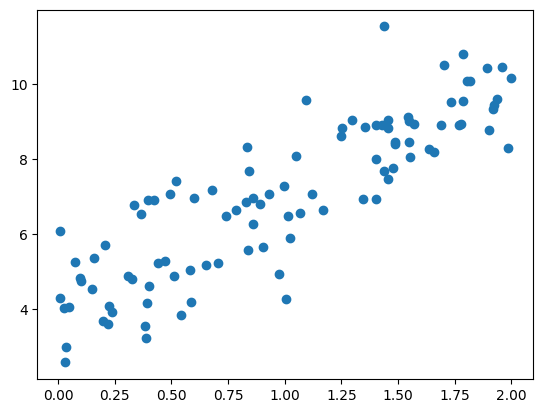

In [7]:
plt.scatter(x, y)

### 使用梯度下降法训练
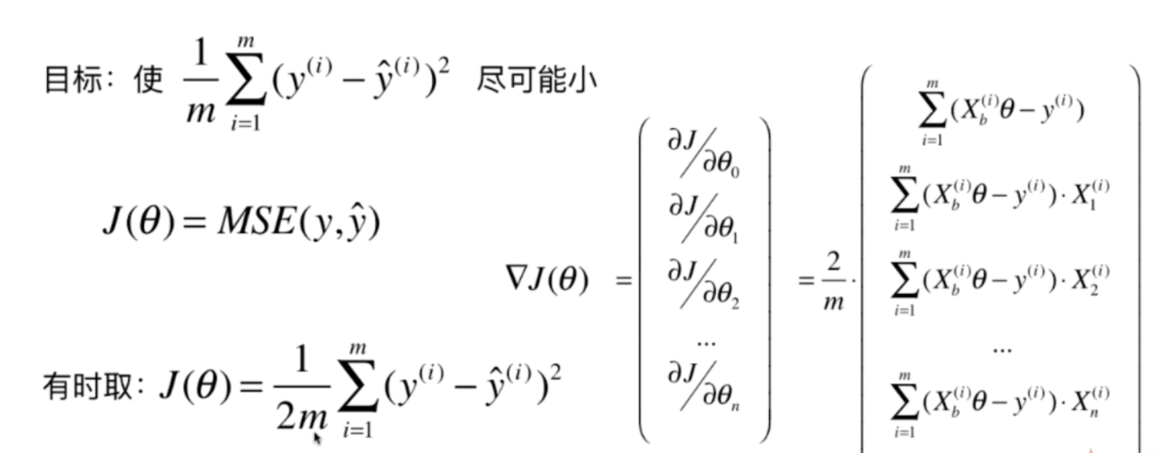

In [8]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('inf')

In [9]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    
    return res * 2 / len(X_b)

In [11]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0

    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient

        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break

        i_iter += 1
    return theta

In [14]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [15]:
theta

array([4.02145786, 3.00706277])

### 封装我们的线性回归算法

In [19]:
from LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [20]:
lin_reg.coef_

array([3.00706277])

In [21]:
lin_reg.interception_

4.021457858204859